In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

Once again, we make use of the Pokémon data for this exercise.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## TO DO **Task 1**
There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

(0.0, 6.0)

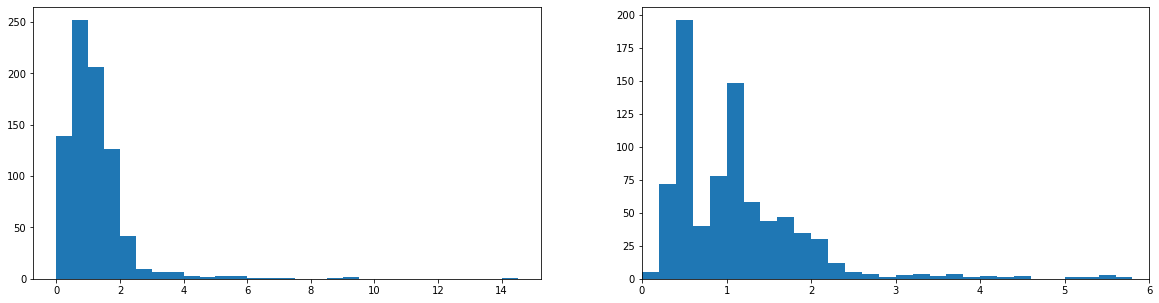

In [3]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins)

plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins)
# Plot the histogram with a changed axis limit
plt.xlim(0, 6)

#### Expected Output: TO DO Task 1

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


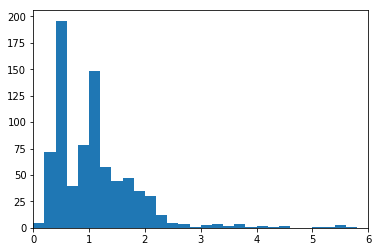

In [4]:
# run this cell to check your work against ours
scales_solution_1()

## TO DO **Task 2**
In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

### Scale the x-axis to log-type

Text(0.5, 0, 'The x-axis limits are NOT changed. They are only scaled to log-type')

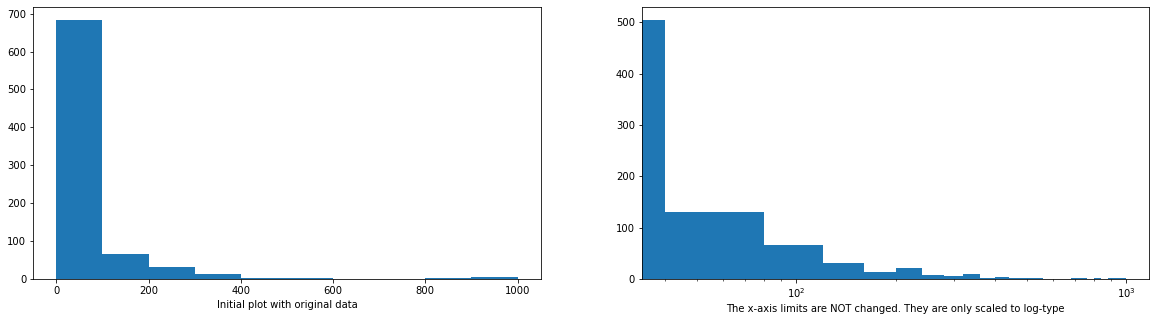

In [4]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight')
plt.xlabel('Initial plot with original data')

plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins)
plt.xscale('log')
plt.xlabel('The x-axis limits are NOT changed. They are only scaled to log-type')

### Scale the x-axis to log-type, and change the axis limit

In [5]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [6]:
# Transform the describe() to a scale of log10
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

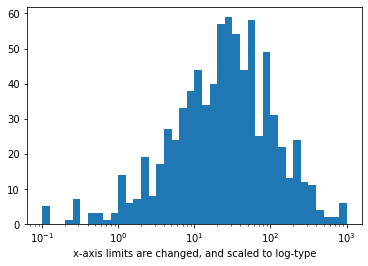

In [10]:
# Axis transformation
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins)

plt.xscale('log')
plt.xlabel('x-axis limits are changed, and scaled to log-type');

###  Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

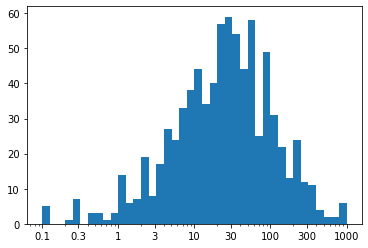

In [11]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=pokemon, x='weight', bins=bins)

plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

#### Expected Output: TO DO Task 2

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


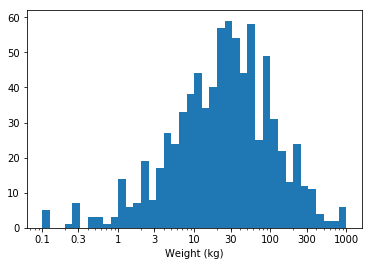

In [6]:
# run this cell to check your work against ours
scales_solution_2()

## Alternative Approach

### Custom scaling the given data Series, instead of using the built-in log scale

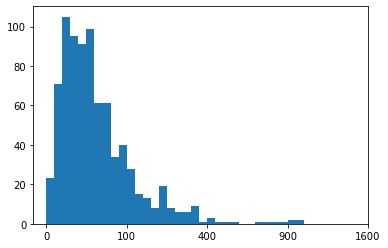

In [12]:
def sqrt_trans(x, inverse=False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
    
# Bin resizing, to transform the x-axis
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins=bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse=True).astype(int));